# SUPERVISED LEARNING PROJECT

Importo todas las librería que voy a utilizar

In [71]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
pd.set_option('display.max_columns', 500)
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import svm
from sklearn.metrics import roc_curve
from sklearn import metrics

Leo el csv con el que voy a trabajar en este proyecto. El csv lo he sacado de kaggle del siguiente enlace: https://www.kaggle.com/uciml/zoo-animal-classification

In [72]:
data = pd.read_csv('./zoo.csv')
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


Veo la matriz de correlación

In [73]:
data.corr()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


Dibujo la matriz de correlación para que sea más fácil de entender y visualizar

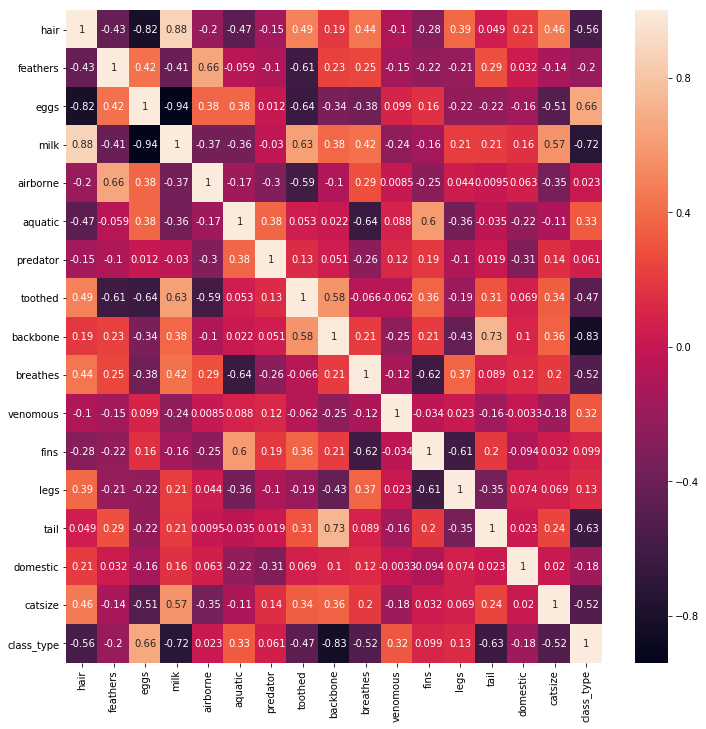

In [74]:
fig, ax = plt.subplots(figsize=(12,12))
sb.heatmap(data.corr(),annot=True,ax=ax)

Compruebo si hay valores nulos

In [75]:
data.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

La columna que me interesa es la de 'class_type', así que compruebo si sus valores único están en orden

In [76]:
data['class_type'].unique()

array([1, 4, 2, 7, 6, 5, 3])

In [7]:
"""
Esta es una opción muy interante que me paso Patricia, no la voy a utilizar, pero la dejo aquí por si la necesito 
en algún momento por si aparece algo semejante.

anova = []
for col in columnas:

   a = (stats.f_oneway(
           df[col][df['data']==1],
           df[col][df['data']==2],
           df[col][df['data']==3],
           ))
   anova.append((col, a))
anova
#si es menor que 0.05 vemos que estan relacionados con la columna bins_quality
columnas_importantes=[i[0] for i in anova if i[1][1]<0.05]
columnas_importantes.append('bins_quality')
columnas_importantes
"""

"\nEsta es una opción muy interante que me paso Patricia, no la voy a utilizar, pero la dejo aquí por si la necesito \nen algún momento por si aparece algo semejante.\n\nanova = []\nfor col in columnas:\n\n   a = (stats.f_oneway(\n           df[col][df['data']==1],\n           df[col][df['data']==2],\n           df[col][df['data']==3],\n           ))\n   anova.append((col, a))\nanova\n#si es menor que 0.05 vemos que estan relacionados con la columna bins_quality\ncolumnas_importantes=[i[0] for i in anova if i[1][1]<0.05]\ncolumnas_importantes.append('bins_quality')\ncolumnas_importantes\n"

Elimino duplicados, pero ya veo que no los hay

In [77]:
print(len(data))
data = data.drop_duplicates()
print(len(data))

101
101


Compruebo el formato de los elementos de las columnas

In [78]:
data.dtypes

animal_name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
class_type      int64
dtype: object

Elimino la columna 'animal_name', la cual no necesito para mi estudio.

In [79]:
data1 = data.drop(['animal_name'], axis=1)
data1.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


Observo los outliers

In [44]:
stats = data1.describe().transpose()
stats['IQR'] = stats['75%'] - stats['25%']
stats

,count,mean,std,min,25%,50%,75%,max,IQR
hair,101.0,0.425743,0.496921,0.0,0.0,0.0,1.0,1.0,1.0
feathers,101.0,0.198020,0.400495,0.0,0.0,0.0,0.0,1.0,0.0
eggs,101.0,0.584158,0.495325,0.0,0.0,1.0,1.0,1.0,1.0
milk,101.0,0.405941,0.493522,0.0,0.0,0.0,1.0,1.0,1.0
airborne,101.0,0.237624,0.427750,0.0,0.0,0.0,0.0,1.0,0.0
aquatic,101.0,0.356436,0.481335,0.0,0.0,0.0,1.0,1.0,1.0
predator,101.0,0.554455,0.499505,0.0,0.0,1.0,1.0,1.0,1.0
toothed,101.0,0.603960,0.491512,0.0,0.0,1.0,1.0,1.0,1.0
backbone,101.0,0.821782,0.384605,0.0,1.0,1.0,1.0,1.0,0.0
breathes,101.0,0.792079,0.407844,0.0,1.0,1.0,1.0,1.0,0.0


Convierto los datos categóricos a datos ordinales, para eso uso la función get_dummies

In [80]:
data1_dummy=pd.get_dummies(data=data1,drop_first=True)

In [81]:
data1_dummy.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


## Comienzo con la modelización

In [141]:
x_columns = [col for col in data1.columns.values if col != "class_type"]
X=data1[x_columns]
y=data1['class_type']

### En mi primer modelo voy a utilizar **LogisticRegression**

In [142]:
cl_logReg= LogisticRegression()

In [143]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2)
cl_logReg.fit(X_train, y_train)

/home/rafa/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rafa/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
y_predlr= cl_logReg.predict(X_test)
confusion_matrix(y_test, y_predlr)

array([[5, 0, 0, 0, 0, 0, 0],
       [0, 8, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 1]])

In [95]:
accuracy_score(y_test, y_predlr)

1.0

Buenísimo el resultado, he sacado la matriz de confusión y el entremaniento de los test... ¡acierta en el 100% de los casos!

### En mi segundo modelo voy a utilizar **KNeighborsClassifier** con un **k=3**

In [125]:
cl_kn3= KNeighborsClassifier( n_neighbors= 3)

In [126]:
cl_kn3.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [110]:
y_predkn3= cl_kn3.predict(X_test)
confusion_matrix(y_test, y_predkn3)

array([[9, 0, 0, 0, 0, 0],
       [0, 5, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 1]])

In [111]:
accuracy_score(y_test, y_predkn3)

1.0

Vuelve a ser muy bueno mi resultado, también acerta el 100% de las veces.

### En mi tercer modelo voy a utilizar **KNeighborsClassifier** pero esta vez con un **k=5**

In [127]:
cl_kn5= KNeighborsClassifier(n_neighbors= 5)
cl_kn5.fit(X_train, y_train)
y_predkn5= cl_kn5.predict(X_test)
confusion_matrix(y_test, y_predkn5)

array([[10,  0,  1,  0,  0,  0],
       [ 0,  4,  0,  0,  0,  0],
       [ 0,  0,  3,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  0]])

In [128]:
accuracy_score(y_test, y_predkn5)

0.9047619047619048

Veo que aquí empeora mi modelo, la precisión desciende al 90'4%

### En el cuarto modelo utilizo DecisionTreeClassifier

In [61]:
clf_tree = tree.DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)
acc_tree=clf_tree.score(X_test,y_test)

In [62]:
y_predDT= clf_tree.predict(X_test)
confusion_matrix(y_test, y_predDT)

array([[11,  0,  0,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  1]])

In [63]:
acc_tree

0.9523809523809523

No está mal el resultado, acierta en el 95'23% de los casos

### El quinto modelo que utilizo es Support Vector Classification.

In [64]:
clf_svc = svm.SVC(gamma ="auto").fit(X_train, y_train)
svc=clf_svc.score(X_test,y_test)

In [65]:
y_predsvc= clf_svc.predict(X_test)
confusion_matrix(y_test, y_predsvc)

array([[11,  0,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0,  0],
       [ 1,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  1]])

In [66]:
svc

0.9047619047619048

Este modelo no es tan bueno como los anteriores, acierta el 90.4% de la veces.

### El sexto modelo que utilizo es RandomForestClassifier.

In [144]:
clf_RF = RandomForestClassifier(n_estimators = 10).fit(X_train, y_train)
RF=clf_RF.score(X_test,y_test)

In [145]:
y_predRF= clf_RF.predict(X_test)
confusion_matrix(y_test, y_predRF)

array([[8, 0, 0, 0, 0, 0],
       [0, 5, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 3]])

In [146]:
RF

1.0

RandomForestClassifier me acierta el 100% de las veces.

## Conclusions

Los modelos que mejor funcionan y que aciertan el 100% de las veces son **RandomForestClassifier**, **KNeighborsClassifier con un k=3** y **LogisticRegression**. Detrás viene **DecisionTreeClassifier** con un 95'23% de aciertos. Por último tengo a **KNeighborsClassifier con k=5** y **Support Vector Classification** con un acierto ambos de un 90'4%.